**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [69]:
np.random.seed(12)

x = np.linspace(10,100,10)
y = line(0.5, x,0, errors)

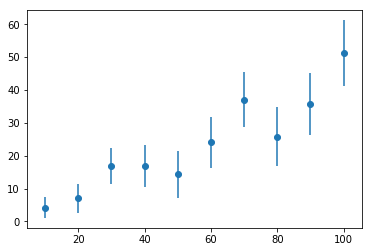

In [70]:
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.scatter(x, y, label = "a line")

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [71]:
newx = sm.add_constant(x)

In [72]:
print(y)
print(x)
print(newx)

[  4.2214561    7.02917094  16.92434399  16.93871643  14.30085738
  24.08571828  37.08498364  25.78031953  35.70740117  51.22761629]
[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [73]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     233.6
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           9.59e-08
Time:                        12:58:45   Log-Likelihood:                -30.728
No. Observations:                  10   AIC:                             63.46
Df Residuals:                       9   BIC:                             63.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4292      0.028     15.284      0.000       0.366       0.493
==============================================================================
Omnibus:                        0.173   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.361
Skew:                           0.133   Prob(JB):                        0.835
Kurtosis:                       2.108   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#THE RIGHT WAY
smfit_c = smf.OLS(y, newx).fit()
smfit_c.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     49.00
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           0.000113
Time:                        12:58:46   Log-Likelihood:                -30.663
No. Observations:                  10   AIC:                             65.33
Df Residuals:                       8   BIC:                             65.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2802      3.966     -0.323      0.755     -10.427       7.866
x1             0.4475      0.064      7.000      0.000       0.300       0.595
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.408
Skew:                          -0.065   Prob(JB):                        0.815
Kurtosis:                       2.019   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

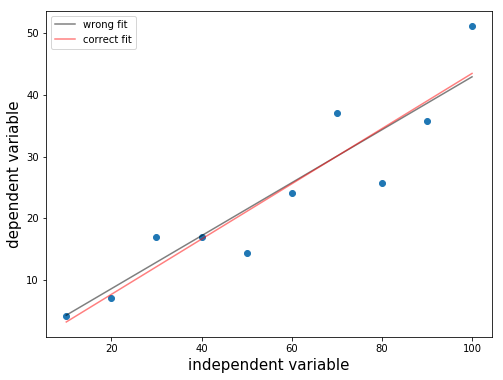

In [96]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x, y)
ax.plot(x, smfit.predict(x), 'k', alpha=0.5, label = 'wrong fit')
ax.plot(x, smfit_c.predict(newx), 'r', alpha=0.5, label = 'correct fit')
ax.set_xlabel('independent variable',size = 15)
ax.set_ylabel('dependent variable', size = 15)
ax.legend()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

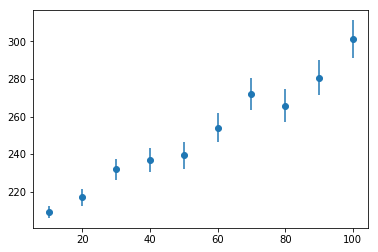

In [129]:
np.random.seed(12)

x = np.linspace(10,100,10)
y = line(1, x, 200, errors)

plt.scatter(x,y)
plt.errorbar(x,y, yerr=errors(x), fmt='.')

# 6. repeat step 3

In [130]:
newx = sm.add_constant(x)

In [131]:
smfit2 = smf.OLS(y, x).fit()
smfit2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     58.52
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           3.16e-05
Time:                        14:56:20   Log-Likelihood:                -59.422
No. Observations:                  10   AIC:                             120.8
Df Residuals:                       9   BIC:                             121.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7863      0.495      7.650      0.000       2.667       4.906
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                0.686
Skew:                           0.045   Prob(JB):                        0.710
Kurtosis:                       1.720   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
smfit2_c = smf.OLS(y,newx).fit()
smfit2_c.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     219.7
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           4.23e-07
Time:                        14:56:21   Log-Likelihood:                -30.663
No. Observations:                  10   AIC:                             65.33
Df Residuals:                       8   BIC:                             65.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.7198      3.966     50.100      0.000     189.573     207.866
x1             0.9475      0.064     14.821      0.000       0.800       1.095
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.408
Skew:                          -0.065   Prob(JB):                        0.815
Kurtosis:                       2.019   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

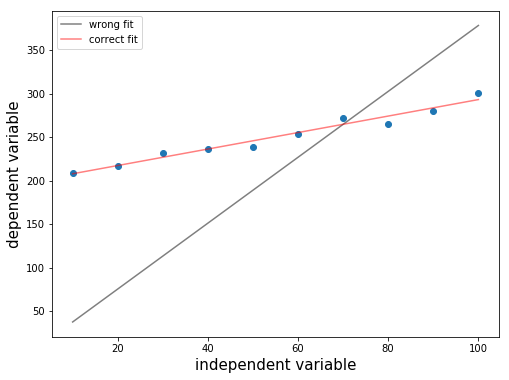

In [133]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(x, y)
ax.plot(x, smfit2.predict(x), 'k', alpha=0.5, label = 'wrong fit')
ax.plot(x, smfit2_c.predict(newx), 'r', alpha=0.5, label = 'correct fit')
ax.set_xlabel('independent variable',size = 15)
ax.set_ylabel('dependent variable', size = 15)
ax.legend()

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [124]:
w = 1 / errors(x)
smfit2_w = smf.WLS(y,newx, weights=w).fit()
smfit2_w.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     284.5
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           1.55e-07
Time:                        14:54:53   Log-Likelihood:                -29.668
No. Observations:                  10   AIC:                             63.34
Df Residuals:                       8   BIC:                             63.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.3725      2.959     67.378      0.000     192.549     206.196
x1             0.9364      0.056     16.868      0.000       0.808       1.064
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.480
Skew:                          -0.010   Prob(JB):                        0.787
Kurtosis:                       1.927   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

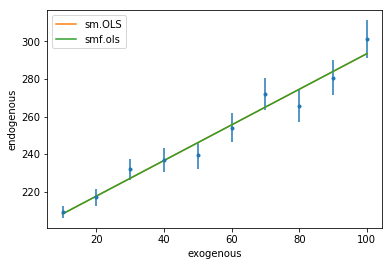

In [138]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit2_c.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();